In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Used to build and deploy machine learning apps
import tensorflow as tf
# Deep Learning API for creating Neural Networks (Runs on TensorFlow)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model
# Scikit-learn : machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# **Binary Classification**

In [ ]:
wine = pd.read_csv("https://raw.githubusercontent.com/derekbanas/tensorflow/main/winequalityN.csv")  #Get wine data
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
wine = wine.dropna() #Delete rows with unknown
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine.rename(columns={'type':'white_wine'},  #Rename a column
            inplace=True)
wine

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#Change white_wine based on condition
# wine.loc[wine["white_wine"] == "white", "white"] = 1
# wine.loc[wine["white_wine"] == "red", "white"] = 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
white_wine = le.fit_transform(wine["white_wine"])   
wine["white_wine"] = white_wine
wine.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Change Quality based on condition
wine.loc[wine['quality'] <= 6, 'quality'] = 0 #Bad wine
wine.loc[wine['quality'] >= 7, 'quality'] = 1 #Good wine
wine.head()

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [ ]:
wine["quality"].value_counts() #Good wine count

0    5192
1    1271
Name: quality, dtype: int64

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']), #Normalize the data
)

In [ ]:
X = wine.drop("quality", axis=1) #Features
Y = wine["quality"] #Label
X

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
#Split data into Training and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=53)

In [ ]:
# Transform training data 
ct.fit(X_train)
#Transform training and test data with normalization 
#(MinMaxScaler)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal

array([[0.32231405, 0.13333333, 0.37951807, ..., 0.27906977, 0.12359551,
        0.11594203],
       [0.21487603, 0.17333333, 0.26506024, ..., 0.35658915, 0.14606742,
        0.2173913 ],
       [0.36363636, 0.12      , 0.19879518, ..., 0.13178295, 0.15168539,
        0.2173913 ],
       ...,
       [0.30578512, 0.42      , 0.        , ..., 0.51162791, 0.20224719,
        0.28985507],
       [0.2892562 , 0.21333333, 0.15662651, ..., 0.09302326, 0.17977528,
        0.75362319],
       [0.19834711, 0.14666667, 0.10240964, ..., 0.2248062 , 0.13483146,
        0.14492754]])

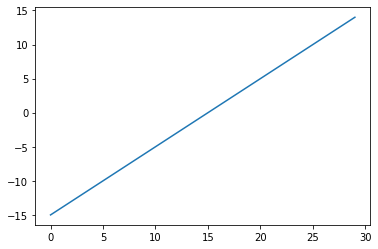

In [ ]:
#Activation - Linear
samp_ten = tf.cast(tf.range(-15, 15), tf.float32) # Create a example tensor with values from -15 to 15
plt.plot(samp_ten)

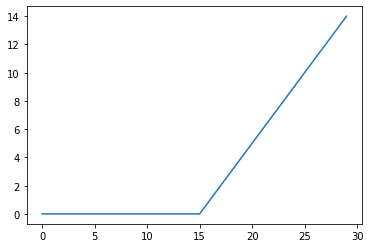

In [ ]:
#Activation - ReLU
def relu(x): # Turn negative values to zero and other wise leave them as they are
  return(tf.maximum(0, x))

plt.plot(relu(samp_ten))
# When we give our model non-linear functions it's able to find patterns
# in non-linear data (Neural networks use linear and non-linear activations
# to find patterns in data)
# Now we can draw patterns that are curved and bent

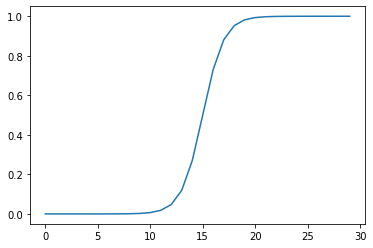

In [ ]:
#Activation - Sigmoid
# Replicate sigmoid : sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return(1 / (1 + tf.exp(-x)))
# This allows us to draw non-straight lines (curve)
plt.plot(sigmoid(samp_ten))

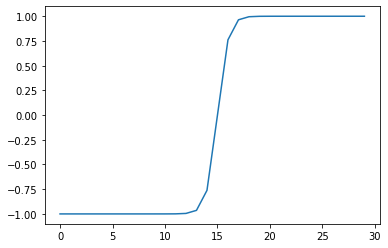

In [ ]:
#Activation - Tanh
def tanh(x):
  return(tf.tanh(x))

plt.plot(tanh(samp_ten))

In [ ]:
tf.random.set_seed(52) #Set Random Seed 
# Create a model
# Activation functions help our network decide what is important data.
# They receive data and add weightings to it and pass the results to other hidden layers
# Depending on the error value the weights are updated
model_1 = tf.keras.Sequential([
       tf.keras.layers.Dense(50, activation=tf.keras.activations.relu), #hidden layer, ReLU activation
       tf.keras.layers.Dense(50, activation=tf.keras.activations.relu), #hidden layer, ReLU activation
       tf.keras.layers.Dense(50, activation=tf.keras.activations.relu), #hidden layer, ReLU activation
       tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) #output layer, sigmoid activation                        
])
# Compile the model
# Compile the model (Calc errors, optimize and evaluate)
# Loss : Finds the average of the errors between predictions and 
# observed data (How incorrect are our predictions)
# Adam : Optimizes our guesses by smoothing the predictions 
# to the observed data 
# Metrics test the accuracy of the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
# Fit the model
# Take the data and try to fit the data with 100 tries creating a trained model
# An epoch is a full iteration over the training data
history = model_1.fit(X_train_normal, Y_train, epochs=150)

Epoch 1/150
162/162 [==============================] - 3s 4ms/step - loss: 0.4783 - accuracy: 0.7925
Epoch 2/150
162/162 [==============================] - 1s 4ms/step - loss: 0.4039 - accuracy: 0.8143
Epoch 3/150
162/162 [==============================] - 1s 4ms/step - loss: 0.3933 - accuracy: 0.8157
Epoch 4/150
162/162 [==============================] - 1s 5ms/step - loss: 0.3833 - accuracy: 0.8199
Epoch 5/150
162/162 [==============================] - 1s 5ms/step - loss: 0.3787 - accuracy: 0.8215
Epoch 6/150
162/162 [==============================] - 1s 4ms/step - loss: 0.3755 - accuracy: 0.8250
Epoch 7/150
162/162 [==============================] - 1s 4ms/step - loss: 0.3701 - accuracy: 0.8217
Epoch 8/150
162/162 [==============================] - 1s 4ms/step - loss: 0.3657 - accuracy: 0.8236
Epoch 9/150
162/162 [==============================] - 1s 5ms/step - loss: 0.3622 - accuracy: 0.8242
Epoch 10/150
162/162 [==============================] - 1s 4ms/step - loss: 0.3605 - accura

In [ ]:
model_1.evaluate(X_train_normal, Y_train) #Evaluate Accuracy of the model based on Training Data

162/162 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.8888


[0.24379295110702515, 0.8887814283370972]

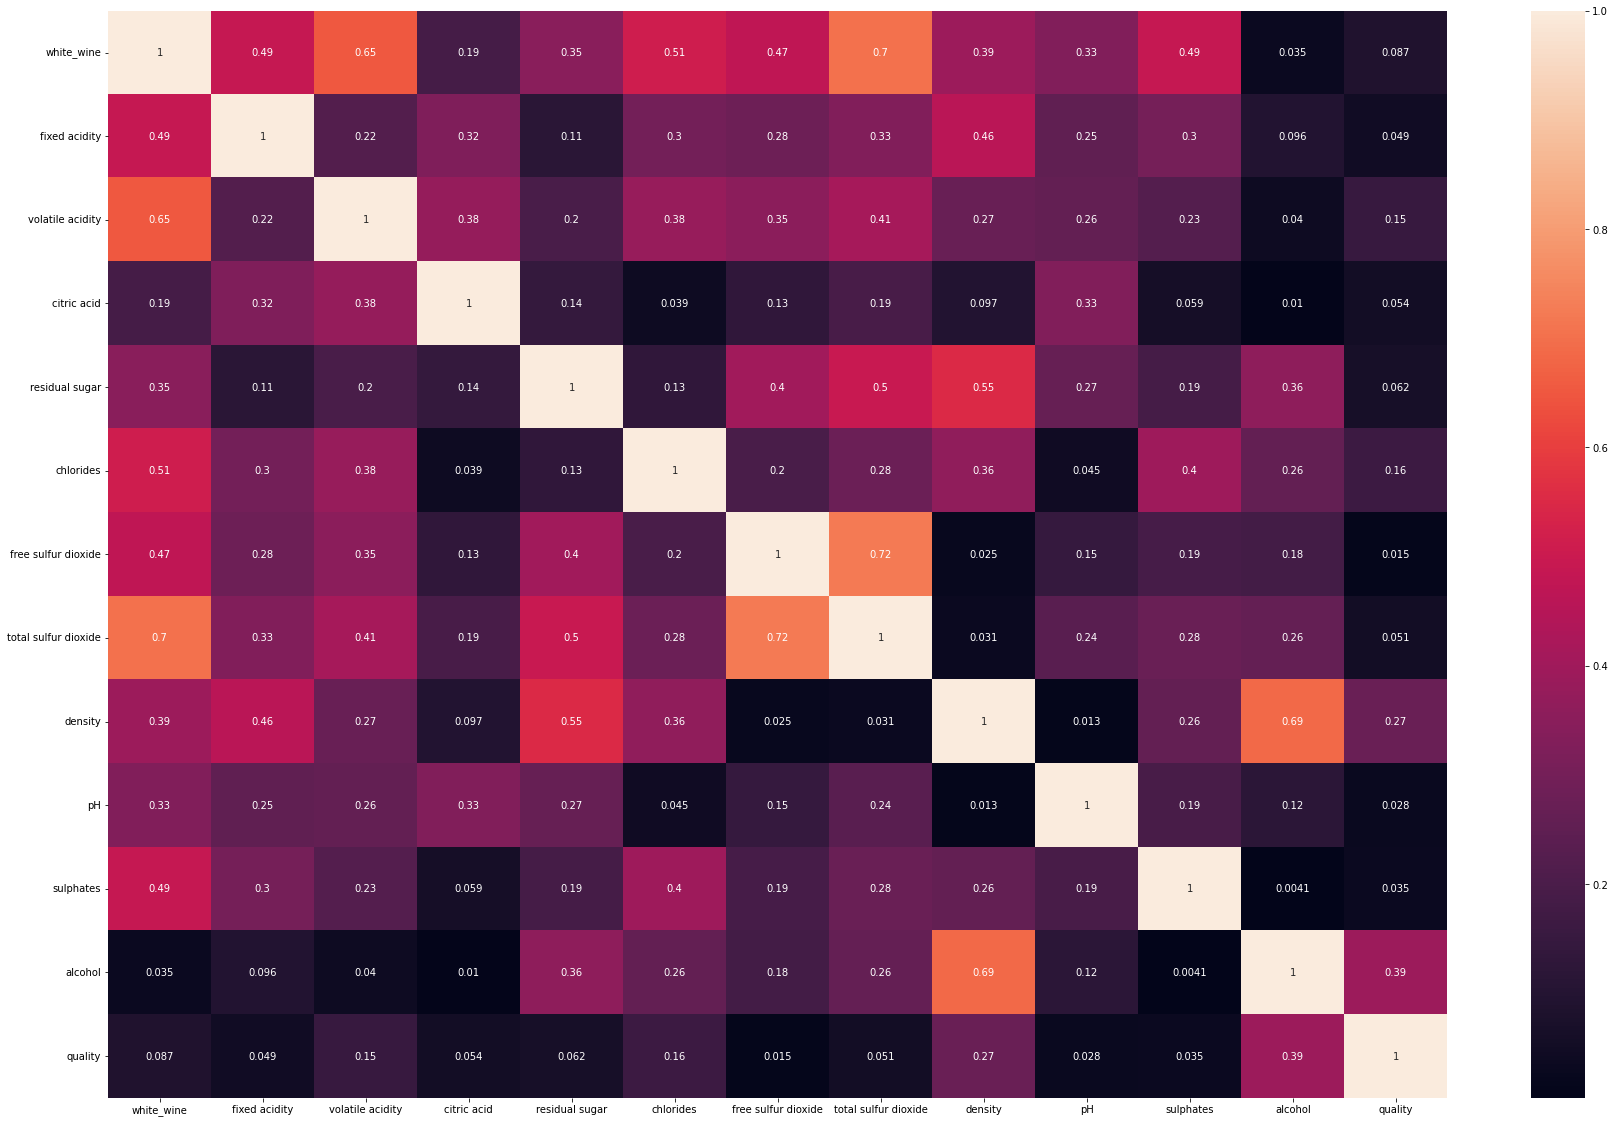

In [ ]:
# When we say data is correlated that means the data is related to each other. When a feature moves in a
# certain direction a label also tends to move in that same direction
plt.figure(figsize=(30,20))
sns.heatmap(wine.corr().abs(), annot=True)

Text(0.5, 1.0, 'Model 1 Loss Curve')

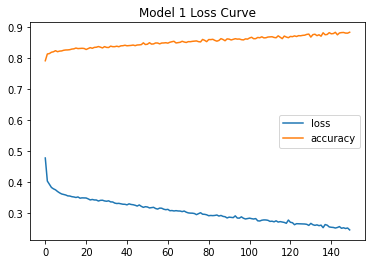

In [ ]:
pd.DataFrame(history.history).plot() #Plot Loss Curve
plt.title("Model 1 Loss Curve")

In [ ]:
# Create model to fit on the training data and test on testing data
tf.random.set_seed(52)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
optimizer="Adam",
metrics=["accuracy"])
# The callback works during model training
# At each epoch if we change the learning rate and the 
# schedular is going to give Adam the updated learning rate

# The learning rate starts at 1e-4 (.0001) and after each epoch 
# increase the learning rate 10^(epoch/20)
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history_lr = model_2.fit(X_train_normal, Y_train, epochs=100,
                              callbacks=[scheduler]) #Can have Multiple Callbacks

Epoch 1/100
162/162 [==============================] - 1s 2ms/step - loss: 0.6355 - accuracy: 0.7025 - lr: 1.0000e-04
Epoch 2/100
162/162 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.8054 - lr: 1.1220e-04
Epoch 3/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8054 - lr: 1.2589e-04
Epoch 4/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8054 - lr: 1.4125e-04
Epoch 5/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8054 - lr: 1.5849e-04
Epoch 6/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8070 - lr: 1.7783e-04
Epoch 7/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8124 - lr: 1.9953e-04
Epoch 8/100
162/162 [==============================] - 0s 2ms/step - loss: 0.4032 - accuracy: 0.8133 - lr: 2.2387e-04
Epoch 9/100
162/162 [==============================] - 0

Text(0.5, 1.0, 'Learning Rate vs. Loss')

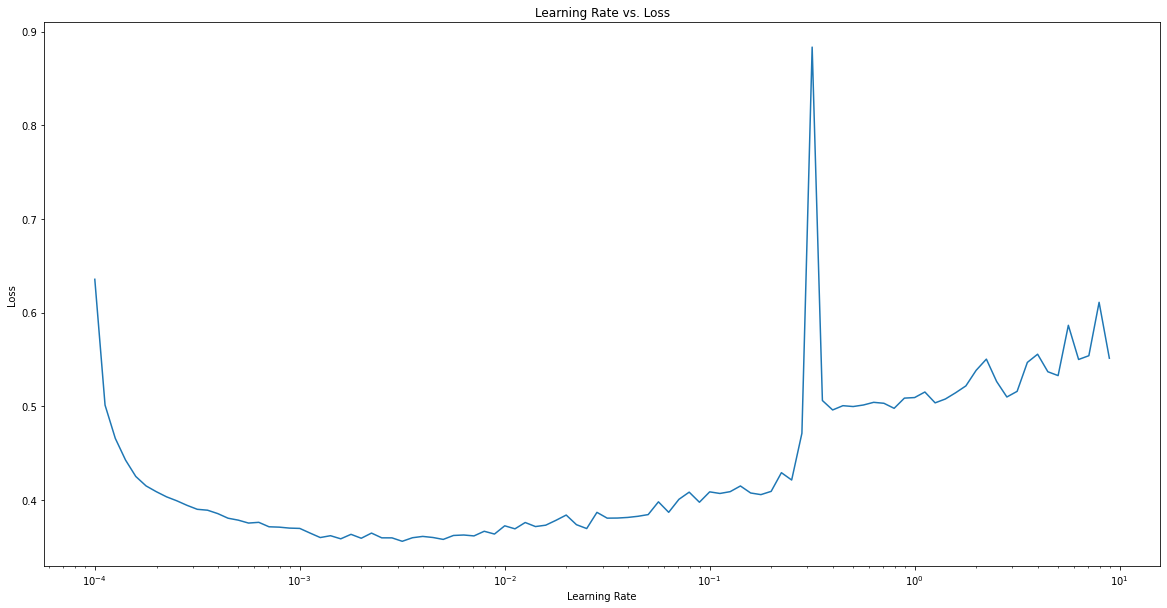

In [ ]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lrs, history_lr.history['loss']) #Plotting Learning Rate vs. Loss 
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [ ]:
loss, accuracy = model_1.evaluate(X_test_normal, Y_test) #Evaluate with Test Data
print(f"Model Loss (Test Set) : {loss}")
print(f"Model Accuracy (Test Set) : {accuracy}")

41/41 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8438
Model Loss (Test Set) : 0.39775946736335754
Model Accuracy (Test Set) : 0.843774139881134


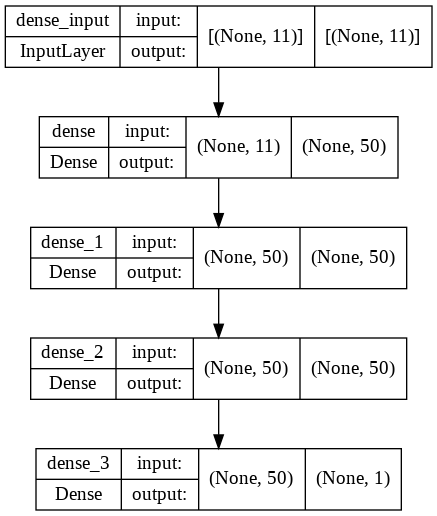

In [ ]:
#Each hidden layer tries to find pattern and then feeds to next layer
plot_model(model_1, show_shapes=True)

In [ ]:
#Get weights value and size
weights, biases = model_1.layers[1].get_weights()
weights, weights.shape

(array([[-0.2734833 , -0.18883367, -0.5373224 , ..., -0.78084457,
          0.14384681, -0.2373786 ],
        [-0.10590221, -0.18089017, -0.09853926, ..., -0.18167734,
         -0.23470904, -0.05058858],
        [-0.34347832, -0.0755872 ,  0.16065033, ...,  0.20432092,
          0.1325613 , -0.20798692],
        ...,
        [ 0.16146211,  0.61223006, -0.12812491, ...,  0.41827592,
         -0.6303995 ,  0.16673586],
        [-0.12772098,  0.17540893, -0.8019728 , ..., -0.37218332,
         -0.21452735, -0.09701858],
        [ 0.23989356, -0.1046817 , -0.17532624, ...,  0.0640522 ,
          0.09700777, -0.05329858]], dtype=float32), (50, 50))

These 50 values start off as random weightings and adjust to decide how to best use these values to influence the neural networks decisions (Guesses). Our neural network updates weights and biases as it improves its predictions.


In [ ]:
#Get biases value and size
biases, biases.shape

(array([ 0.12056417, -0.07587569,  0.03807514,  0.05830953,  0.03652964,
        -0.01940195,  0.09900476, -0.15575324,  0.06280194,  0.00412012,
        -0.04479536, -0.05851273,  0.14846967,  0.0532188 , -0.08431356,
        -0.1123106 ,  0.0971773 ,  0.0017106 , -0.09283638, -0.0086076 ,
         0.06199421,  0.08218935,  0.05517907, -0.02368846, -0.02734165,
        -0.02033243, -0.06448485,  0.04767755,  0.01134566, -0.05241113,
         0.0750623 , -0.08591162, -0.06824428, -0.03138925, -0.04998833,
        -0.02868577,  0.07458758, -0.040635  ,  0.00298552, -0.00231895,
         0.01947263,  0.08206912, -0.0111316 , -0.03930813,  0.01051589,
         0.12241147,  0.01052783, -0.02846793,  0.00484762, -0.01507891],
       dtype=float32), (50,))

There is one bias vector for each hidden unit in our neural network. It is paired with the weight tensor. The bias tensor is responsible for defining how much the patterns in the weights tensor should influence the next laye

# **Multi-class Classification**

In [ ]:
#Download Data and split into Training and Testing
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


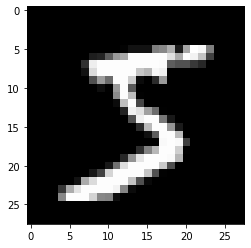

In [ ]:
plt.imshow(x_train[0], cmap = 'gray') #View Image
plt.show()

In [ ]:
#Normalize the Features
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
#Show unique Values in Label Numpy Array
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
label_names = np.unique(y_test) #Store Label Names

In [ ]:
tf.random.set_seed(53) #Set random seed
#Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #Flatten the 28x28 image
    tf.keras.layers.Dense(4, activation = 'relu'), #Create 4 value tensor for each of the 784 cells
    tf.keras.layers.Dense(4, activation = 'relu'), #Optimize and create another 4 value tensor
    tf.keras.layers.Dense(10, activation = 'softmax') #Output is 1 of the 10 possible labels
])
#Use SparseCategoricalCrossentropy if the data isn't normalized or one-hot encoded
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test)) #Fit the model

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4995 - accuracy: 0.4203 - val_loss: 1.1006 - val_accuracy: 0.6472
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8851 - accuracy: 0.7234 - val_loss: 0.7702 - val_accuracy: 0.7692
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7496 - accuracy: 0.7699 - val_loss: 0.7165 - val_accuracy: 0.7857
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7079 - accuracy: 0.7868 - val_loss: 0.6830 - val_accuracy: 0.7992
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6804 - accuracy: 0.7972 - val_loss: 0.6619 - val_accuracy: 0.8075
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6593 - accuracy: 0.8049 - val_loss: 0.6455 - val_accuracy: 0.8130
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6413 - accuracy: 0.8105 - val_loss: 0.6274 - val_accuracy:

In [ ]:
#The ideal learning rate is where the loss decreases the most
tf.random.set_seed(53) #Set random seed
#Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #Flatten the 28x28 image
    tf.keras.layers.Dense(4, activation = 'relu'), #Create 4 value tensor for each of the 784 cells
    tf.keras.layers.Dense(4, activation = 'relu'), #Optimize and create another 4 value tensor
    tf.keras.layers.Dense(10, activation = 'softmax') #Output is 1 of the 10 possible labels
])
#Use SparseCategoricalCrossentropy if the data isn't normalized or one-hot encoded
#Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
#Learning rate callback
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history_lr2 = model_4.fit(x_train, y_train, epochs = 40, validation_data = (x_test, y_test), callbacks = [scheduler]) #Fit the model

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0840 - accuracy: 0.1900 - val_loss: 1.9248 - val_accuracy: 0.2417 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8328 - accuracy: 0.2446 - val_loss: 1.7510 - val_accuracy: 0.2684 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6752 - accuracy: 0.3005 - val_loss: 1.5933 - val_accuracy: 0.3455 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5004 - accuracy: 0.4196 - val_loss: 1.4167 - val_accuracy: 0.4708 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3607 - accuracy: 0.4937 - val_loss: 1.3027 - val_accuracy: 0.5253 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2599 - accuracy: 0.5435 - val_loss: 1.2120 - val_accuracy: 0.5946 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [============

Text(0.5, 1.0, 'Learning Rate vs. Loss')

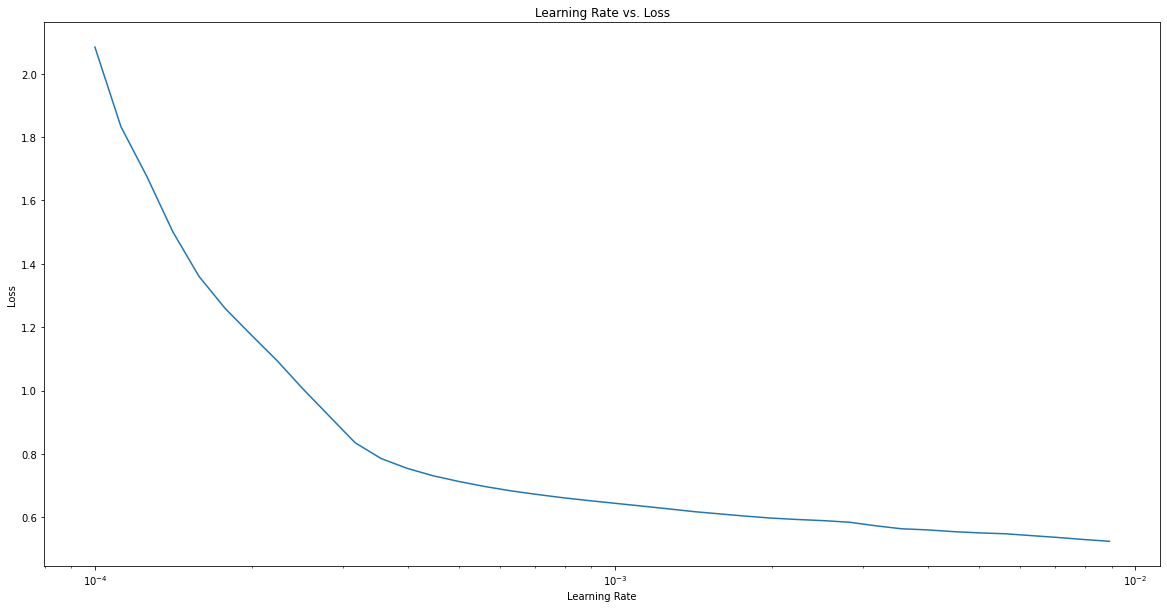

In [ ]:
#Plot to find Ideal Learning Rate
lr2 = 1e-4 * (10**(tf.range(40)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lr2, history_lr2.history['loss']) #Plotting Learning Rate vs. Loss 
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [ ]:
#Prediction Probabilities
y_prob = model_4.predict(x_test)
y_prob[0]

array([2.6558002e-04, 1.7045505e-10, 1.9238328e-07, 1.3474646e-03,
       1.3310938e-05, 3.7950738e-03, 1.9239806e-08, 9.8192203e-01,
       1.4216876e-05, 1.2642172e-02], dtype=float32)

In [ ]:
label_names[tf.argmax(y_prob[0])] #Get the actual label name our model predicted

7

In [ ]:
y_test[0] #Get the actual number from test label

7